# Importando bibliotecas

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

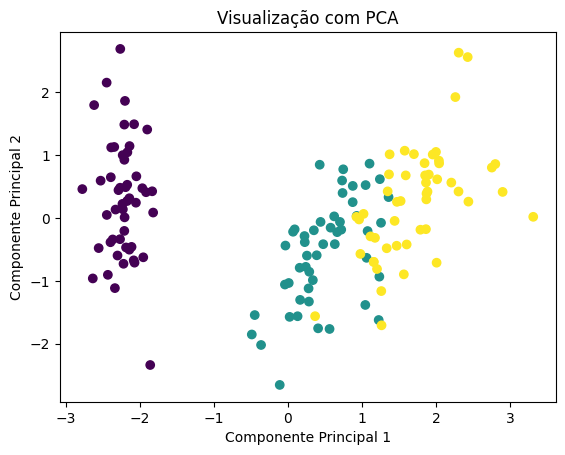

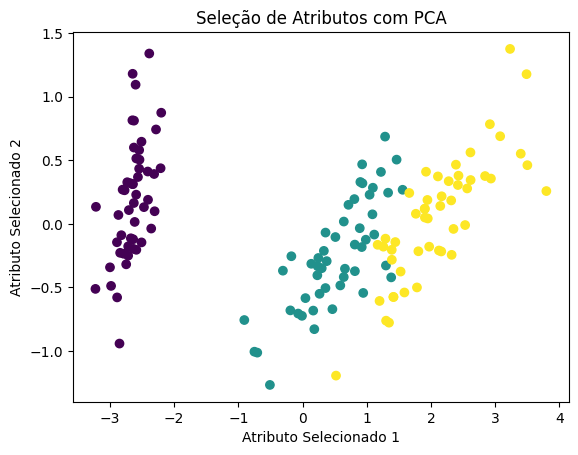

In [4]:
df = pd.read_csv('Iris-2-1.csv')

X = df.drop('Subespécie', axis=1)
y = df['Subespécie']

# Padronizar as features para ter média 0 e variância 1
scaler = StandardScaler();
X_scaler = scaler.fit_transform(X);

# Aplicar PCA para visualização (2 ou 3 dimensões)
pca_visualization = PCA(n_components=3)
X_visualization = pca_visualization.fit_transform(X_scaler)


# Plotar gráfico  em 2 dimensões com os componentes principais
plt.scatter(X_visualization[:, 0], X_visualization[:, 1], c=y)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização com PCA')
plt.show()

#Aplicar PCA para seleção de atributos (2 atributos)
pca_selection = PCA(n_components=2)
X_selection = pca_selection.fit_transform(X)

#Plotar gráfico com os atributos selecionados
plt.scatter(X_selection[:, 0], X_selection[:, 1], c=y)
plt.xlabel('Atributo Selecionado 1')
plt.ylabel('Atributo Selecionado 2')
plt.title('Seleção de Atributos com PCA')
plt.show()




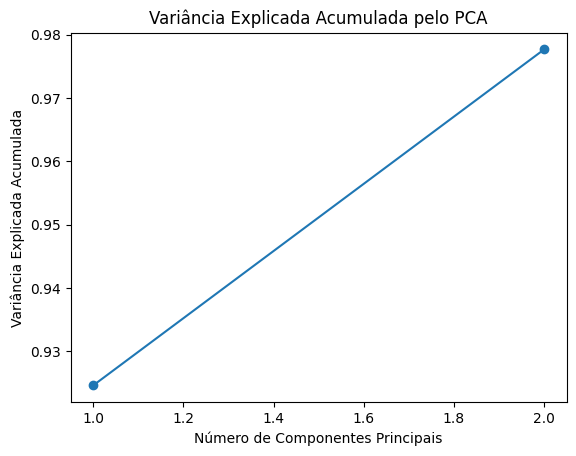

In [5]:
# Calcular a variância explicada
explained_variance_ratio = pca_selection.explained_variance_ratio_

# Calcular a variância explicada acumulada
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plotar o gráfico da variância explicada acumulada
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada pelo PCA')
plt.show()

# Discusão das abordagens 

1. A árvore de decisão da Iris com apenas 2 atributos selecionados seria mais fácil de interpretar?

R: Do ponto de vista do grupo é possivel sim concluir que uma arvore de decisão da Iris com apenas dois atributos pode ser sim mais facil de intepretar aplicados nesse exercicio proposto. Isso acontece pois ao reduzirmos a quantidade de atributos a nossa arvore se torna mais facil de compreender, tornando o processo de leitura e tomada de decisão mais simples.

Importante reforçar que esse tipo de abordagem é "delicada" pois pode gerar a perda de informação considerando que os nossos dados vão ser reduzidos no processo, podendo assim gerar impactos negativos na nossa analise.

Desta forma sempre é importante considerar-se o contexto no qual você esta trabalhando para tomar a decisão se é necessario ou não aplicar a redução com base nos ganhos e perdas para a interpretação dos seus dados.




2. Vale a (eventual) perda de informação por usar menos atributos?

R:Conforme já introduzido na pergunta anterior isso vai depender do contexto do projeto ao qual a PCA esta sendo aplicada. A perda de informação é algo que deve sempre ser avaliado.

Se pensarmos pelos lado dos beneficios, podemos citar que a redução da dimensionalidade pode proporcionar uma simplificação do modelo que consequentemente vai se tornar mais facil de interpretar. Teremos a complexidade reduzida ao eliminar atributos que podem ser considerados irrelevantes para a analise gerando uma redução no tempo de treinamento ao lidar com menos atributos.

3. Nesse trabalho, na parte de visualização, podem ser usadas 2 ou 3 dimensões (componentes principais); como escolher a quantidade de dimensões para o gráfico?

R: Para escolher a quantidade de dimensões que vamos usar após aplicar o PCA podemos utilizar uma metrica chamda "variância explicada" que vai nos retornar a informação que determina quantos components principais são necessarios para representar os dados.